# kaggle Titanic(Keras 신경망 구현)

kaggle 입문을 위해 다른 분들의 구현내용을 보고 작성해 본 커널입니다.

kaggle문제 풀이를 하는 과정은 대략적으로 다음과 같은 과정을 거치게 됩니다.
    1. 데이터 분석
        - 데이터의 특성을 분석해서 feature 특징 및 중요도를 평가
    2. 데이터 조작
        - 모델의 결과가 잘 나오도록 feature 삭제 및 변형된 feature를 추가한다.
    3. 모델 생성
    4. 훈련
    5. 제출

위 과정들이 칼같이 나눠지지 않고 1과 2의 과정은 섞일 수도 있지만 전체적인 흐름은 대부분 제출되는 커널들이 유사합니다.


## 목차

**1. [데이터 분석](#data_analysis)** <br>
**2. [데이터 편집](#data_manipulation)** <br>
**3. [모델 생성/훈련/제출](#modelling_training_submit)** <br>

<a id="Introduction"></a> <br> 


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() # seaborn 속성을 기본값으로 설정

<a id="data_analysis"></a> <br> 
# **1. 데이터 분석:**

파일에서 데이터를 읽어들임

In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#from enum import Enum
class Columns:
    # 원래 존재하는 항목
    PassengerId = "PassengerId"
    Survived = "Survived"
    Pclass = "Pclass"
    Name = "Name"
    Sex = "Sex"
    Age = "Age"
    SibSp = "SibSp"
    Parch = "Parch"
    Ticket = "Ticket"
    Fare = "Fare"
    Cabin = "Cabin"
    Embarked = "Embarked"
    
    # 새로 생성하는 항목
    Title = "Title"
    FareBand = "FareBand"
    Family = "Family"
    Deck = "Deck" # Cabin의 알파벳을 떼서 Deck을 지정한다.
    CabinExists = "CabinExists"

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test의 경우 예측에서 제출해야 하는 데이터이기에 Survived 항목이 없다.

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>



#### 데이터가 존재하지 않는 feature들을 확인해 본다.

### 데이터 속성 확인

Pclass 에 따른 생존률

1. train[[Columns.Pclass, Columns.Survived] <= Pclass, Survivied만 있는 dataframe 생성
2. groupby([Columns.Pclass]) <= Pclass column 값마다 group으로 묶음(DataFrameGroupBy)
3. 묶인 항목(Pclass. 여러 column이 있을 경우 각각)의 평균(mean())값을 계산하고 그래프로 출력(plot.bar())

   Pclass  Survived
0       3         0
1       1         1
2       3         1
3       1         1
4       3         0


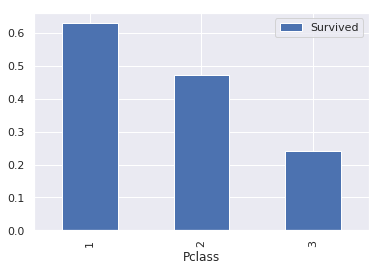

In [6]:
print(train[[Columns.Pclass, Columns.Survived]].head())
train[[Columns.Pclass, Columns.Survived]].groupby([Columns.Pclass]).mean().plot.bar()

성별에 따른 생존률

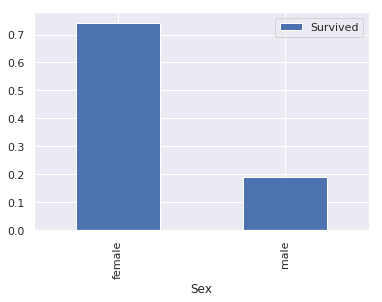

In [7]:
train[[Columns.Sex, Columns.Survived]].groupby([Columns.Sex]).mean().plot.bar()

### countplot :     
    show the **counts** of observations in each **categorical** bin using bars
    x : x축에 그려질 분류 기준 categorical column
    hue : y축에 각각의 value마다 count를 세서 표시될 categorical column
    data : DataFrame 객체

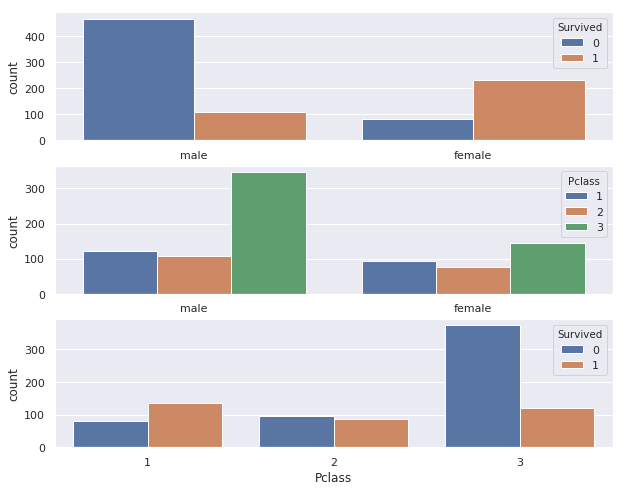

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
sns.countplot(x=Columns.Sex, hue=Columns.Survived, data=train, ax=ax[0])
sns.countplot(x=Columns.Sex, hue=Columns.Pclass, data=train, ax=ax[1])
sns.countplot(x=Columns.Pclass, hue=Columns.Survived, data=train, ax=ax[2])

Age에 따른 생존률를 확인해 본다.

### kde(kernel density estimation) :     
    커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 그림
    density estimation :
        어떤 변수가 가질 수 있는 값 및 그 값을 가질 가능성의 정도를 추정
    
    kernel function:
        원점을 중심으로 대칭이면서 적분이 1인 non-negative 함수
        가우시안, uniform함수 등이 대표적인 커널 함수이다.
    
    kernel density estimation:
        커널 함수를 이용하여 히스토그램 함수를 smoothing하는 방법
        아래 링크 참고
        https://darkpgmr.tistory.com/147

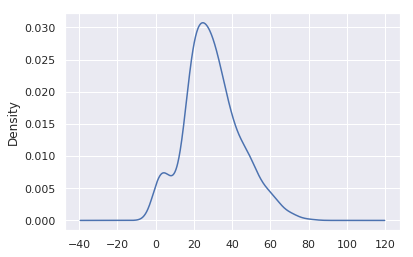

In [9]:
train[Columns.Age].plot.kde() # 가우시안 커널 함수를 사용해서 KDE plot을 그림

나이대를 분할하여 bar graph로 출력한다.

Age : 0  ~  80
gap: 6
[-1, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, inf]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


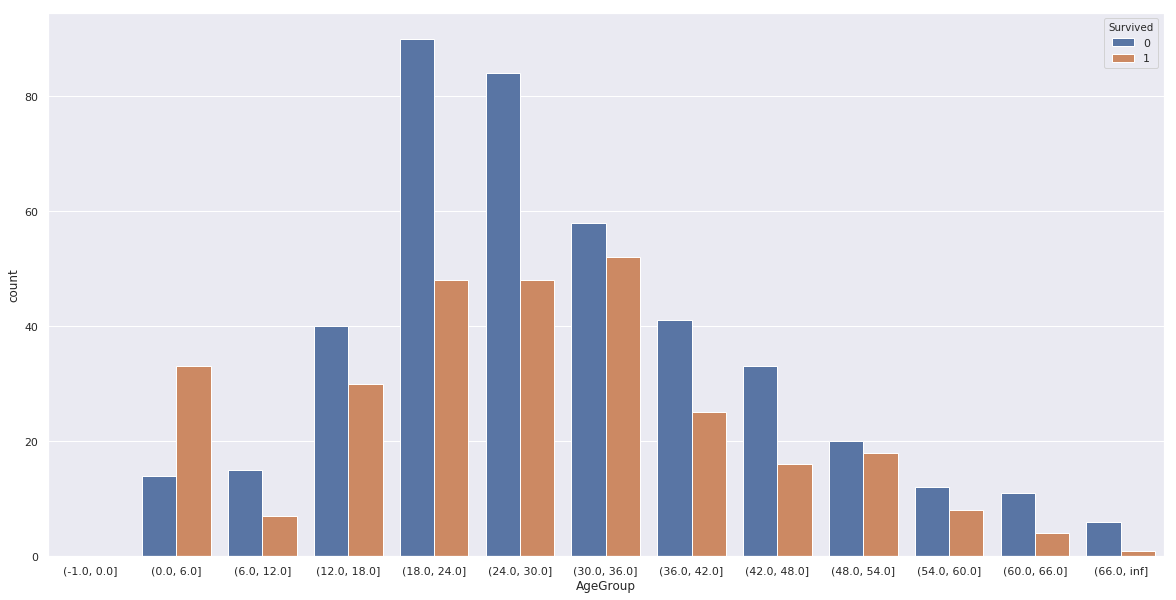

In [10]:
df = train[train[Columns.Age].isnull() == False] # Age가 없는 데이터는 뺀다.
#df.describe()

bincount = 12
# 나이대로 나누어서 출력해 본다.
age_min = df[Columns.Age].min().astype('int')
age_max = df[Columns.Age].max().astype('int')
print("Age :", age_min, " ~ ", age_max)
gap = ((age_max - age_min) / bincount).astype(int)
print('gap:', gap)

bins = [-1]
for i in range(bincount):
    bins.append(i * gap)
bins.append(np.inf)
print(bins)

_df = df
_df['AgeGroup'] = pd.cut(_df[Columns.Age], bins) #bins로 구분된 'AgeGroup' category column을 생성한다.
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='AgeGroup', hue=Columns.Survived, data=_df, ax=ax) #'AgeGroup'을 기준으로 생존/사망 수를 표시한다.

Pclass/Age에 따른 생존률 변화량을 확인한다.

### violinplot
    categorical한 데이터의 분포를 시각적으로 비교할 수 있는 차트이다.
    x : x축에 그려질 column
    y : y축에 그려질 column
    hue : kde plot으로 그려질 column

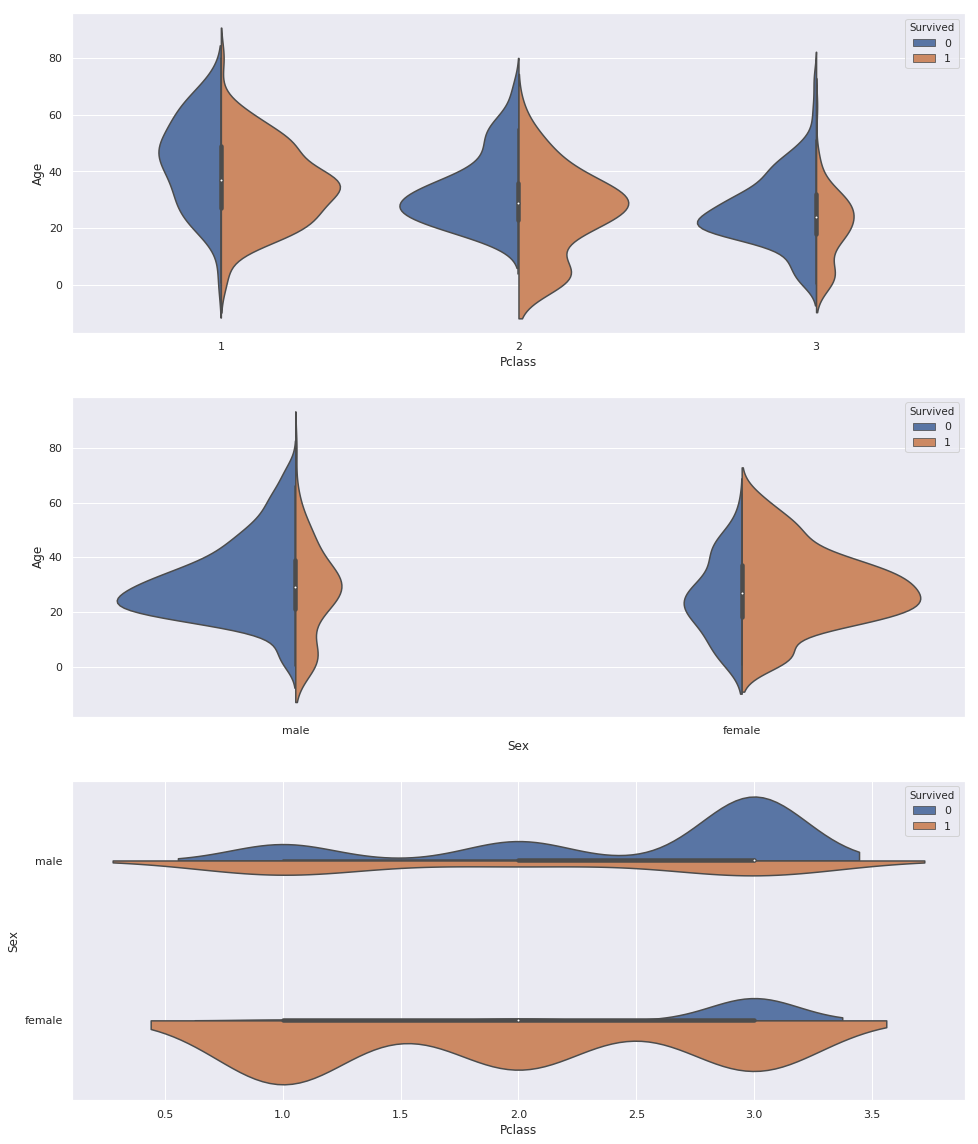

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 20))
sns.violinplot(x=Columns.Pclass, y=Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[0])
sns.violinplot(x=Columns.Sex, y=Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[1])
sns.violinplot(x=Columns.Pclass, y=Columns.Sex, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[2])


가족 수 ( Parch + SibSp + 1(자기자신))과 생존률을 비교해 본다.

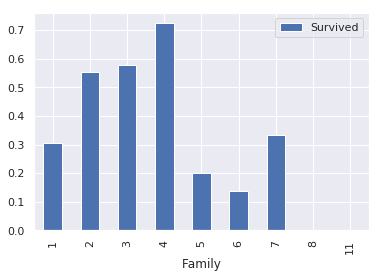

In [12]:
_train = train
_train['Family'] = _train[Columns.SibSp] + _train[Columns.Parch] + 1 #형제 + 직계 + 자기자신(1)
_train[['Family', Columns.Survived]].groupby('Family').mean().plot.bar()

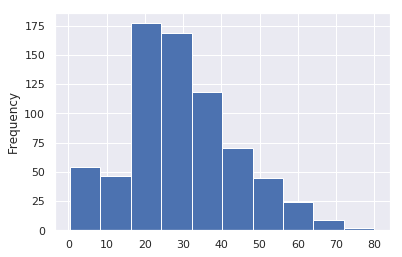

In [13]:
train[Columns.Age].plot.hist() # 승객들의 나이 분포

countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

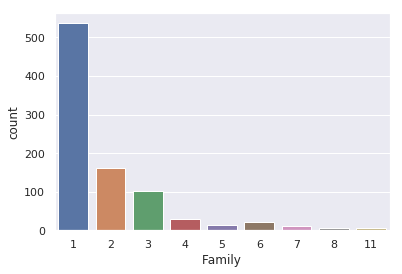

In [14]:
sns.countplot(x='Family', data=_train)

Family 별로 Survived값의 구성을 보여준다.

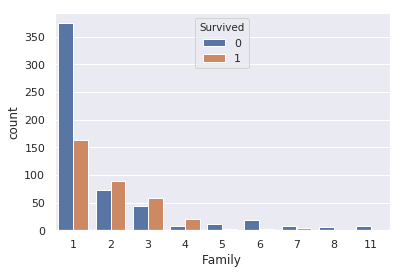

In [15]:
sns.countplot(x='Family', hue=Columns.Survived, data=_train)

<a id="data_manipulation"></a> <br> 
# **2. 데이터 편집:**

비어있는 데이터(null)을 처리한다.<br>

###### 기존 feature들을 보완/가공
**Age** : null이 많고 나이가 중요할 것으로 판단되니 데이터를 채워야 할 필요가 있다.<br>
**Cabin** : null이 너무 많다.<br>
**Embarked** : null이 거의 없으므로 중요하지 않은 값으로 채워도 문제가 없어 보임<br>
**Parse, SibSp** : 합쳐서 Family로 만들고 삭제하자.

###### 새로운 feature를 추가
**Family** : Parch + SibSp + 1(자기자신) <br>
**Title** : Name에서 추출해서 생성한다.

## train/test를 따로 하지 말고, 합쳐서 처리하고 마지막(모델 넣기 직전)에 다시 분리한다.

In [16]:
train_len = train.shape[0]
'''
ignore_index=True로 하지 않으면 test의 인덱스가 0부터 시작해서 iterrow()등의 반복자를 
사용할 때 오동작한다.(0이 두개가 되는 등)
'''

merged = train.append(test, ignore_index=True) 
print("train len : ", train.shape[0])
print("test len : ", test.shape[0])
print("merged len : ", merged.shape[0])

train len :  891
test len :  418
merged len :  1309


/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Parch와 SibSp를 Family로 변경하고 해당 항목들은 삭제한다.

In [17]:
merged[Columns.Family] = merged[Columns.Parch] + merged[Columns.SibSp] + 1
if Columns.Parch in merged:    
    merged = merged.drop([Columns.Parch], axis=1)
if Columns.SibSp in merged:
    merged = merged.drop([Columns.SibSp], axis=1)
    
merged.head()

,Age,Cabin,Embarked,Family,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket
0,22.0,NaN,S,2,7.2500,"Braund, Mr. Owen Harris",1,3,male,0.0,A/5 21171
1,38.0,C85,C,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,female,1.0,PC 17599
2,26.0,NaN,S,1,7.9250,"Heikkinen, Miss. Laina",3,3,female,1.0,STON/O2. 3101282
3,35.0,C123,S,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,female,1.0,113803
4,35.0,NaN,S,1,8.0500,"Allen, Mr. William Henry",5,3,male,0.0,373450


### Embarked 정리
빈 갯수가 몇개 없으므로 그냥 가장 많은 것으로 채운다.

In [18]:
most_embarked_label = merged[Columns.Embarked].value_counts().index[0]

merged = merged.fillna({Columns.Embarked : most_embarked_label})
merged.describe(include="all")

,Age,Cabin,Embarked,Family,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket
count,1046.000000,295,1309,1309.000000,1308.000000,1309,1309.000000,1309.000000,1309,891.000000,1309
unique,NaN,186,3,NaN,NaN,1307,NaN,NaN,2,NaN,929
top,NaN,C23 C25 C27,S,NaN,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,CA. 2343
freq,NaN,6,916,NaN,NaN,2,NaN,NaN,843,NaN,11
mean,29.881138,NaN,NaN,1.883881,33.295479,NaN,655.000000,2.294882,NaN,0.383838,NaN
std,14.413493,NaN,NaN,1.583639,51.758668,NaN,378.020061,0.837836,NaN,0.486592,NaN
min,0.170000,NaN,NaN,1.000000,0.000000,NaN,1.000000,1.000000,NaN,0.000000,NaN
25%,21.000000,NaN,NaN,1.000000,7.895800,NaN,328.000000,2.000000,NaN,0.000000,NaN
50%,28.000000,NaN,NaN,1.000000,14.454200,NaN,655.000000,3.000000,NaN,0.000000,NaN
75%,39.000000,NaN,NaN,2.000000,31.275000,NaN,982.000000,3.000000,NaN,1.000000,NaN


Name에서 호칭을 추출해서 새 항목(Title)을 추가하고 숫자값으로 변환한다. <br>
Name은 지운다.

In [19]:
# Name에서 Title 추출(그냥 알파벳 끝에 .이 붙어 있는걸 추출한다.)
merged[Columns.Title] = merged.Name.str.extract('([A-Za-z]+)\. ', expand=False) # expand:True면 DataFrame을, False면 Series를 리턴한다.

print("initial titles : ", merged[Columns.Title].value_counts().index)
#initial titles :  Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Ms', 'Mlle', 'Major',
#                         'Sir', 'Jonkheer', 'Don', 'Mme', 'Countess', 'Lady', 'Dona', 'Capt'],

# 정리(희귀한 title을 모아서 정리한다.)
merged[Columns.Title] = merged[Columns.Title].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
merged[Columns.Title] = merged[Columns.Title].replace(['Countess', 'Lady', 'Sir'], 'Royal')
merged[Columns.Title] = merged[Columns.Title].replace(['Miss', 'Mlle', 'Ms', 'Mme'], 'Mrs')

print("Survival rate by title:")
print("========================")
print(merged[[Columns.Title, Columns.Survived]].groupby(Columns.Title).mean())

idxs = merged[Columns.Title].value_counts().index # 많은 순서대로 정렬해서 오름차순으로 값을 매김
print(idxs)

# 숫자값으로 변경한다.
mapping = {}
for i in range(len(idxs)):
    mapping[idxs[i]] = i + 1
print("Title mapping : ", mapping)
merged[Columns.Title] = merged[Columns.Title].map(mapping)

if Columns.Name in merged:
    merged = merged.drop([Columns.Name], axis=1)
    
merged.head()

initial titles :  Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Mlle', 'Major',
       'Ms', 'Jonkheer', 'Countess', 'Lady', 'Mme', 'Capt', 'Dona', 'Sir',
       'Don'],
      dtype='object')
Survival rate by title:
        Survived
Title           
Master  0.575000
Mr      0.156673
Mrs     0.739550
Rare    0.285714
Royal   1.000000
Index(['Mr', 'Mrs', 'Master', 'Rare', 'Royal'], dtype='object')
Title mapping :  {'Master': 3, 'Mr': 1, 'Mrs': 2, 'Royal': 5, 'Rare': 4}


,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title
0,22.0,NaN,S,2,7.2500,1,3,male,0.0,A/5 21171,1
1,38.0,C85,C,2,71.2833,2,1,female,1.0,PC 17599,2
2,26.0,NaN,S,1,7.9250,3,3,female,1.0,STON/O2. 3101282,2
3,35.0,C123,S,2,53.1000,4,1,female,1.0,113803,2
4,35.0,NaN,S,1,8.0500,5,3,male,0.0,373450,1


1    757
2    462
3     61
4     27
5      2
Name: Title, dtype: int64


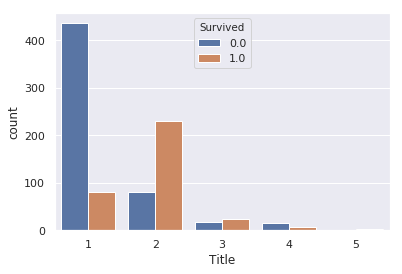

In [20]:
sns.countplot(x=Columns.Title, hue=Columns.Survived, data=merged)
print(merged[Columns.Title].value_counts())

Sex 항목을 숫자로 변경

In [21]:
mapping = {'male':0, 'female':1}
merged[Columns.Sex] = merged[Columns.Sex].map(mapping)

In [22]:
merged.head(n=10)

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title
0,22.0,NaN,S,2,7.2500,1,3,0,0.0,A/5 21171,1
1,38.0,C85,C,2,71.2833,2,1,1,1.0,PC 17599,2
2,26.0,NaN,S,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2
3,35.0,C123,S,2,53.1000,4,1,1,1.0,113803,2
4,35.0,NaN,S,1,8.0500,5,3,0,0.0,373450,1
5,NaN,NaN,Q,1,8.4583,6,3,0,0.0,330877,1
6,54.0,E46,S,1,51.8625,7,1,0,0.0,17463,1
7,2.0,NaN,S,5,21.0750,8,3,0,0.0,349909,3
8,27.0,NaN,S,3,11.1333,9,3,1,1.0,347742,2
9,14.0,NaN,C,2,30.0708,10,2,1,1.0,237736,2


### 비어있는 Age를 처리(채운다)

Title로 적당히 추리한다. (너무 때려맞추기가 아닌지...?)

In [23]:
# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}

mapping = {1:21, 2:28, 3:28, 4:40, 5:50, 6:60}
def guess_age(row):
    return mapping[row[Columns.Title]]

def fixup_age(df):
    for idx, row in df[df[Columns.Age].isnull() == True].iterrows():
        df.loc[idx, Columns.Age] = guess_age(row)
    return df
    
merged = fixup_age(merged)
merged.describe(include='all')

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title
count,1309.000000,295,1309,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000,1309,1309.000000
unique,NaN,186,3,NaN,NaN,NaN,NaN,NaN,NaN,929,NaN
top,NaN,C23 C25 C27,S,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN
freq,NaN,6,916,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN
mean,28.571176,NaN,NaN,1.883881,33.295479,655.000000,2.294882,0.355997,0.383838,NaN,1.514133
std,13.235687,NaN,NaN,1.583639,51.758668,378.020061,0.837836,0.478997,0.486592,NaN,0.696753
min,0.170000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,1.000000
25%,21.000000,NaN,NaN,1.000000,7.895800,328.000000,2.000000,0.000000,0.000000,NaN,1.000000
50%,27.000000,NaN,NaN,1.000000,14.454200,655.000000,3.000000,0.000000,0.000000,NaN,1.000000
75%,35.000000,NaN,NaN,2.000000,31.275000,982.000000,3.000000,1.000000,1.000000,NaN,2.000000


Cabin에서 알파벳을 추출해서 Deck항목을 추가한다.

In [24]:
def make_deck(df):
    '''
    Cabin에서 알파벳을 떼서 Deck 알파벳을 생성한다.
    '''
    df[Columns.Deck] = df[Columns.Cabin].str.extract('([A-Za-z]+)', expand=True)
    return df

merged = make_deck(merged)
merged.describe(include='all')

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck
count,1309.000000,295,1309,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000,1309,1309.000000,295
unique,NaN,186,3,NaN,NaN,NaN,NaN,NaN,NaN,929,NaN,8
top,NaN,C23 C25 C27,S,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,C
freq,NaN,6,916,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,94
mean,28.571176,NaN,NaN,1.883881,33.295479,655.000000,2.294882,0.355997,0.383838,NaN,1.514133,NaN
std,13.235687,NaN,NaN,1.583639,51.758668,378.020061,0.837836,0.478997,0.486592,NaN,0.696753,NaN
min,0.170000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,1.000000,NaN
25%,21.000000,NaN,NaN,1.000000,7.895800,328.000000,2.000000,0.000000,0.000000,NaN,1.000000,NaN
50%,27.000000,NaN,NaN,1.000000,14.454200,655.000000,3.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,35.000000,NaN,NaN,2.000000,31.275000,982.000000,3.000000,1.000000,1.000000,NaN,2.000000,NaN


In [25]:
merged[[Columns.Deck, Columns.Fare]].groupby(Columns.Deck).mean().sort_values(by=Columns.Fare)

,Fare
Deck,
G,14.205000
F,18.079367
T,35.500000
A,41.244314
D,53.007339
E,54.564634
C,107.926598
B,122.383078


Deck과 Survived의 상관관계를 확인하자.

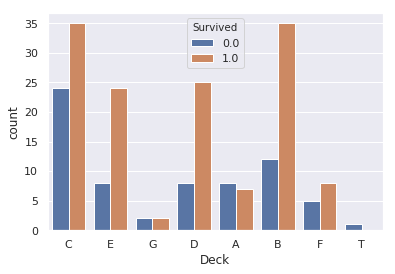

In [26]:
sns.countplot(x=Columns.Deck, hue=Columns.Survived, data=merged)

Deck과 Fare에 따라 생존 수를 확인해 본다.

total survived rate:  0.3838383838383838
deck survived rate:  0.6666666666666666
no deck survived rate:  0.29985443959243085
Fare : 0  ~  512
gap: 32
[-1, 0, 32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, inf]


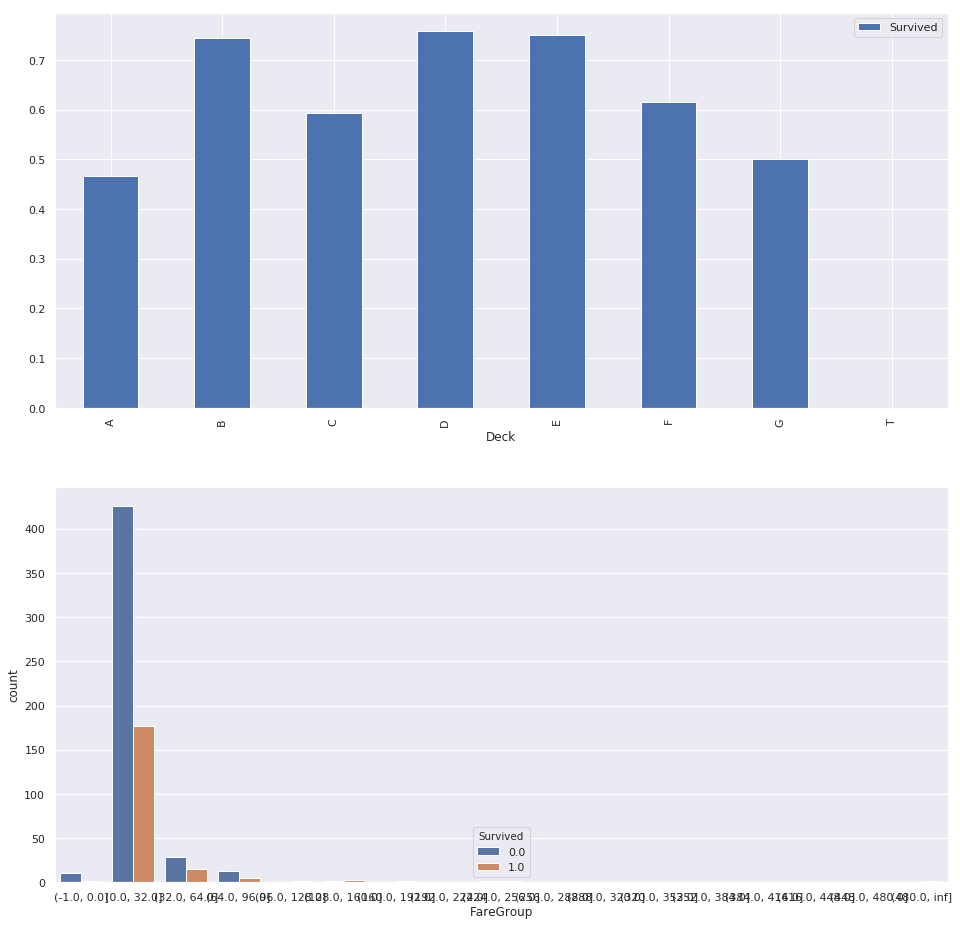

In [27]:
print("total survived rate: ", merged[Columns.Survived].mean())
print("deck survived rate: ", merged[merged[Columns.Deck].isnull() == False][Columns.Survived].mean())
print("no deck survived rate: ", merged[merged[Columns.Deck].isnull()][Columns.Survived].mean())

fig, ax = plt.subplots(2, 1, figsize=(16, 16))
merged[[Columns.Deck, Columns.Survived]].groupby(Columns.Deck).mean().plot.bar(ax=ax[0])

def generate_fare_group(df, slicenum):
    if "FareGroup" in df:
        df.drop("FareGroup", axis=1)
    # 나이대로 나누어서 출력해 본다.
    _min = df[Columns.Fare].min().astype('int')
    _max = df[Columns.Fare].max().astype('int')
    print("Fare :", _min, " ~ ", _max)
    gap = ((_max - _min) / slicenum).astype(int)
    print('gap:', gap)

    bins = [-1]
    for i in range(slicenum):
        bins.append(i * gap)
    bins.append(np.inf)
    print(bins)
    df['FareGroup'] = pd.cut(df[Columns.Fare], bins)    
    return df

df = generate_fare_group(merged.copy(), 16)

# deck 정보가 없는 사람들의 요금에 따른 생존자/사망자 수
sns.countplot(x="FareGroup", hue=Columns.Survived, data=df[df[Columns.Deck].isnull()], ax=ax[1])


처음에는 비어있는 Deck을 채워야 한다고 생각하였다.<br>
그런데 Cabin이 있는 그룹과 없는 그룹간의 생존률 차이가 유의미하고, Cabin에서 추출한 Deck의 생존률이 다 평균은 넘으니 그냥 Cabin의 존재유무로 하는 것은 어떨까 하는 생각이 들었다.<br>
그냥 Cabin의 존재유무 항목을 추가하자.

In [28]:
merged[Columns.CabinExists] = (merged[Columns.Cabin].isnull() == False)
merged[Columns.CabinExists] = merged[Columns.CabinExists].map({True:1, False:0})

In [29]:
merged.head()

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck,CabinExists
0,22.0,NaN,S,2,7.2500,1,3,0,0.0,A/5 21171,1,NaN,0
1,38.0,C85,C,2,71.2833,2,1,1,1.0,PC 17599,2,C,1
2,26.0,NaN,S,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2,NaN,0
3,35.0,C123,S,2,53.1000,4,1,1,1.0,113803,2,C,1
4,35.0,NaN,S,1,8.0500,5,3,0,0.0,373450,1,NaN,0


### Fare 정리

null인 항목이 있다.

In [30]:
merged[merged[Columns.Fare].isnull()]

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck,CabinExists
1043,60.5,NaN,S,1,NaN,1044,3,0,NaN,3701,1,NaN,0


하나만 있으므로 그냥 평균값을 넣어준다.

In [31]:
merged.loc[merged[Columns.Fare].isnull(), [Columns.Fare]] = merged[Columns.Fare].mean()

In [32]:
merged.head()

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck,CabinExists
0,22.0,NaN,S,2,7.2500,1,3,0,0.0,A/5 21171,1,NaN,0
1,38.0,C85,C,2,71.2833,2,1,1,1.0,PC 17599,2,C,1
2,26.0,NaN,S,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2,NaN,0
3,35.0,C123,S,2,53.1000,4,1,1,1.0,113803,2,C,1
4,35.0,NaN,S,1,8.0500,5,3,0,0.0,373450,1,NaN,0


Fare(요금) 항목의 분포를 check해 보자.

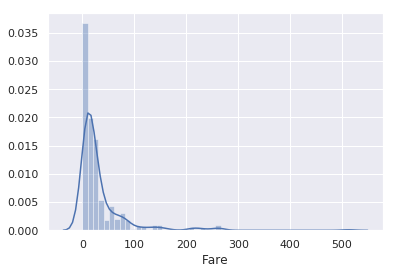

In [33]:
sns.distplot(merged[Columns.Fare])

distribution이 비대칭인 것을 알 수 있다.(high skewness). <br>
모델의 학습에 좋지 않은 영향을 미친다고 한다. <br>
outlier의 영향을 줄이기 위해 log를 취해서 값의 차이를 줄이거나 동수로 그룹을 나누어서 값을 배정하거나 할 수 있다.

In [34]:
'''
log를 취하는 방법
'''

#merged[Columns.Fare] = merged[Columns.Fare].map(lambda i : np.log(i) if i > 0 else 0)

'''
등급을 4단계로 나누는 방법
'''
merged[Columns.FareBand] = pd.qcut(merged[Columns.Fare], 4, labels=[1,2,3,4]).astype('float')
#merged[Columns.Fare] = merged[Columns.FareBand]

merged.head(n=20)


,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck,CabinExists,FareBand
0,22.0,NaN,S,2,7.2500,1,3,0,0.0,A/5 21171,1,NaN,0,1.0
1,38.0,C85,C,2,71.2833,2,1,1,1.0,PC 17599,2,C,1,4.0
2,26.0,NaN,S,1,7.9250,3,3,1,1.0,STON/O2. 3101282,2,NaN,0,2.0
3,35.0,C123,S,2,53.1000,4,1,1,1.0,113803,2,C,1,4.0
4,35.0,NaN,S,1,8.0500,5,3,0,0.0,373450,1,NaN,0,2.0
5,21.0,NaN,Q,1,8.4583,6,3,0,0.0,330877,1,NaN,0,2.0
6,54.0,E46,S,1,51.8625,7,1,0,0.0,17463,1,E,1,4.0
7,2.0,NaN,S,5,21.0750,8,3,0,0.0,349909,3,NaN,0,3.0
8,27.0,NaN,S,3,11.1333,9,3,1,1.0,347742,2,NaN,0,2.0
9,14.0,NaN,C,2,30.0708,10,2,1,1.0,237736,2,NaN,0,3.0


FareBand를 Fare에 넣고 FareBand는 삭제한다.

In [35]:
merged[Columns.Fare] = merged[Columns.FareBand]
merged = merged.drop([Columns.FareBand], axis=1)
merged.head()

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck,CabinExists
0,22.0,NaN,S,2,1.0,1,3,0,0.0,A/5 21171,1,NaN,0
1,38.0,C85,C,2,4.0,2,1,1,1.0,PC 17599,2,C,1
2,26.0,NaN,S,1,2.0,3,3,1,1.0,STON/O2. 3101282,2,NaN,0
3,35.0,C123,S,2,4.0,4,1,1,1.0,113803,2,C,1
4,35.0,NaN,S,1,2.0,5,3,0,0.0,373450,1,NaN,0


In [36]:
merged.head()

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck,CabinExists
0,22.0,NaN,S,2,1.0,1,3,0,0.0,A/5 21171,1,NaN,0
1,38.0,C85,C,2,4.0,2,1,1,1.0,PC 17599,2,C,1
2,26.0,NaN,S,1,2.0,3,3,1,1.0,STON/O2. 3101282,2,NaN,0
3,35.0,C123,S,2,4.0,4,1,1,1.0,113803,2,C,1
4,35.0,NaN,S,1,2.0,5,3,0,0.0,373450,1,NaN,0


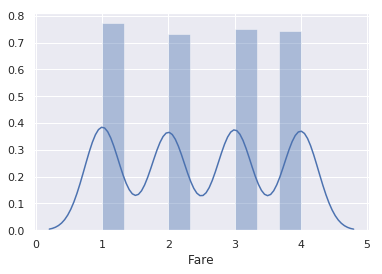

In [37]:
sns.distplot(merged[Columns.Fare])

In [38]:
merged.head()

,Age,Cabin,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Deck,CabinExists
0,22.0,NaN,S,2,1.0,1,3,0,0.0,A/5 21171,1,NaN,0
1,38.0,C85,C,2,4.0,2,1,1,1.0,PC 17599,2,C,1
2,26.0,NaN,S,1,2.0,3,3,1,1.0,STON/O2. 3101282,2,NaN,0
3,35.0,C123,S,2,4.0,4,1,1,1.0,113803,2,C,1
4,35.0,NaN,S,1,2.0,5,3,0,0.0,373450,1,NaN,0


전처리가 다 되었으면 다음 과정을 수행한다.

- 불필요한 열 삭제
- scaling
- train/test로 다시 분리
- train을 input/label로 분리(Survived)

불필요한 열 삭제

In [39]:
if Columns.Ticket in merged:
    merged = merged.drop(labels=[Columns.Ticket], axis=1)
if Columns.Cabin in merged:
    merged = merged.drop(labels=[Columns.Cabin], axis=1)
if Columns.Deck in merged:
    merged = merged.drop(labels=[Columns.Deck], axis=1)

# passengerId는 나중에 삭제한다.
# if Columns.PassengerId in merged:
#     merged = merged.drop(labels=[Columns.PassengerId], axis=1)

In [40]:
merged.describe(include='all')

,Age,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Title,CabinExists
count,1309.000000,1309,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.571176,NaN,1.883881,2.488159,655.000000,2.294882,0.355997,0.383838,1.514133,0.225363
std,13.235687,NaN,1.583639,1.122833,378.020061,0.837836,0.478997,0.486592,0.696753,0.417981
min,0.170000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,NaN,1.000000,1.000000,328.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,NaN,1.000000,2.000000,655.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,35.000000,NaN,2.000000,3.000000,982.000000,3.000000,1.000000,1.000000,2.000000,0.000000


In [41]:
merged.head()

,Age,Embarked,Family,Fare,PassengerId,Pclass,Sex,Survived,Title,CabinExists
0,22.0,S,2,1.0,1,3,0,0.0,1,0
1,38.0,C,2,4.0,2,1,1,1.0,2,1
2,26.0,S,1,2.0,3,3,1,1.0,2,0
3,35.0,S,2,4.0,4,1,1,1.0,2,1
4,35.0,S,1,2.0,5,3,0,0.0,1,0


카테고리 데이터는 one-hot 인코딩으로 변경한다. <br>
- Pclass
- Embarked
- Title

In [42]:
merged = pd.get_dummies(merged, columns=[Columns.Pclass], prefix='Pclass')
merged = pd.get_dummies(merged, columns=[Columns.Title], prefix='Title')
merged = pd.get_dummies(merged, columns=[Columns.Embarked], prefix='Embarked')
merged.head()

,Age,Family,Fare,PassengerId,Sex,Survived,CabinExists,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,Embarked_C,Embarked_Q,Embarked_S
0,22.0,2,1.0,1,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1
1,38.0,2,4.0,2,1,1.0,1,1,0,0,0,1,0,0,0,1,0,0
2,26.0,1,2.0,3,1,1.0,0,0,0,1,0,1,0,0,0,0,0,1
3,35.0,2,4.0,4,1,1.0,1,1,0,0,0,1,0,0,0,0,0,1
4,35.0,1,2.0,5,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1


수치 데이터는 일정 값으로 scaling 해주는 것이 필요하다.<br>
입력 데이터를 0~1로 scaling하는 함수

In [43]:
from sklearn.preprocessing import MinMaxScaler

class NoColumnError(Exception):
    """Raised when no column in dataframe"""
    def __init__(self, value):
        self.value = value
    # __str__ is to print() the value
    def __str__(self):
        return(repr(self.value))

# normalize AgeGroup
def normalize_column(data, columnName):
    scaler = MinMaxScaler(feature_range=(0, 1))    
    if columnName in data:
        aaa = scaler.fit_transform(data[columnName].values.reshape(-1, 1)) # 입력을 2D 데이터로 넣어야 하므로 reshape해 준다.
        aaa = aaa.reshape(-1,) # 다시 원복해서 넣어주지만, 그냥 넣어도 알아서 제대로 들어간다...
        #print(aaa.shape)
        data[columnName] = aaa
        return data
    else:
        raise NoColumnError(str(columnName) + " is not exists!")

def normalize(dataset, columns):
    for col in columns:
        dataset = normalize_column(dataset, col)
    return dataset

In [44]:
merged.head()

,Age,Family,Fare,PassengerId,Sex,Survived,CabinExists,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,Embarked_C,Embarked_Q,Embarked_S
0,22.0,2,1.0,1,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1
1,38.0,2,4.0,2,1,1.0,1,1,0,0,0,1,0,0,0,1,0,0
2,26.0,1,2.0,3,1,1.0,0,0,0,1,0,1,0,0,0,0,0,1
3,35.0,2,4.0,4,1,1.0,1,1,0,0,0,1,0,0,0,0,0,1
4,35.0,1,2.0,5,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1


In [45]:
merged = normalize(merged, [Columns.Age, Columns.Fare, Columns.Family])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [46]:
merged.head(n=10)

,Age,Family,Fare,PassengerId,Sex,Survived,CabinExists,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,Embarked_C,Embarked_Q,Embarked_S
0,0.273456,0.1,0.000000,1,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1
1,0.473882,0.1,1.000000,2,1,1.0,1,1,0,0,0,1,0,0,0,1,0,0
2,0.323563,0.0,0.333333,3,1,1.0,0,0,0,1,0,1,0,0,0,0,0,1
3,0.436302,0.1,1.000000,4,1,1.0,1,1,0,0,0,1,0,0,0,0,0,1
4,0.436302,0.0,0.333333,5,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1
5,0.260929,0.0,0.333333,6,0,0.0,0,0,0,1,1,0,0,0,0,0,1,0
6,0.674308,0.0,1.000000,7,0,0.0,1,1,0,0,1,0,0,0,0,0,0,1
7,0.022924,0.4,0.666667,8,0,0.0,0,0,0,1,0,0,1,0,0,0,0,1
8,0.336089,0.2,0.333333,9,1,1.0,0,0,0,1,0,1,0,0,0,0,0,1
9,0.173243,0.1,0.666667,10,1,1.0,0,0,1,0,0,1,0,0,0,1,0,0


merged를 train/test로 분리한다.

In [47]:
train = merged[:train_len]
test = merged[train_len:]
test = test.drop([Columns.Survived], axis=1)

train = train.drop([Columns.PassengerId], axis=1)

test_passenger_id = test[Columns.PassengerId]
test = test.drop([Columns.PassengerId], axis=1)

print(train.shape)
print(test.shape)

(891, 17)
(418, 16)


In [48]:
train_X = train.drop([Columns.Survived], axis=1).values #Series.values는 numpy array 타입의 데이터임
train_Y = train[Columns.Survived].values.reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(891, 16)
(891, 1)


In [49]:
test.shape

(418, 16)

In [50]:
test.describe(include='all')

,Age,Family,Fare,Sex,CabinExists,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000
mean,0.359269,0.083971,0.495215,0.363636,0.217703,0.255981,0.222488,0.521531,0.574163,0.361244,0.050239,0.014354,0.0,0.244019,0.110048,0.645933
std,0.163191,0.151907,0.382962,0.481622,0.413179,0.436934,0.416416,0.500135,0.495062,0.480937,0.218700,0.119088,0.0,0.430019,0.313324,0.478803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.260929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.323563,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,0.445697,0.100000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,0.949894,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


<a id="modelling_training_submit"></a> <br> 
# **3. 모델 생성/훈련/제출:**

1. keras로 FC레이어를 몇 개 쌓아서 만든 model 생성
2. kfold cross-validation 사용해서 model train
3. 2에서 train완료된 모델 중 accuracy가 가장 높은 모델 선택해서 test데이터 판정
4. csv파일로 생성

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


acc: 82.22%
acc: 78.65%
acc: 77.53%
acc: 82.02%
acc: 86.52%
acc: 87.64%
acc: 80.90%
acc: 91.01%
acc: 84.27%
acc: 79.78%


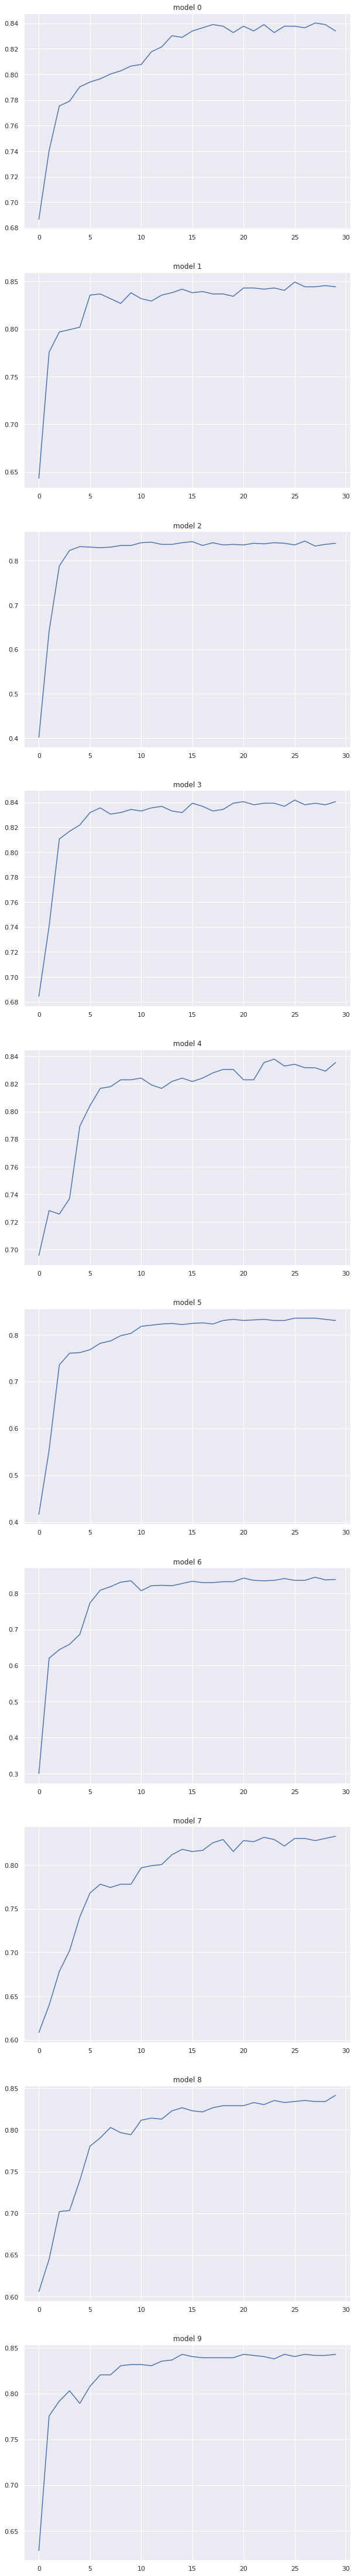

83.05% (+/- 4.06%)
Max : [ 7 ] :  91.01


In [51]:
import keras
from keras import layers, models

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

train_X = train_X.astype(np.float32)
train_Y = train_Y.astype(np.float32)

class SimpleNN(models.Sequential):
    def __init__(self, input_shape, dropout):
        super().__init__()
        
        self.add(layers.Dense(units=20, activation='relu', input_shape=input_shape))
        self.add(layers.Dropout(dropout))
        
        self.add(layers.Dense(units=8, activation='relu'))
        self.add(layers.Dropout(dropout))
        
        self.add(layers.Dense(units=1, activation='sigmoid'))
        self.add(layers.Dropout(dropout))
        
        self.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

batch_size = 32
epochs = 30
dropout = 0.0
n_splits = 10

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=7)

cvscores = []
models = []
acc_hist = []
for _train, _test in kfold.split(train_X, train_Y):
    model = SimpleNN(input_shape=(train_X.shape[1],), dropout=dropout)
    history = model.fit(train_X[_train], train_Y[_train], epochs=epochs, batch_size=batch_size, verbose=0)
    #print("history=", history.history['acc'])
    acc_hist.append(history.history['acc'])
    #evaluate model:
    scores = model.evaluate(train_X[_test], train_Y[_test], verbose=0)    
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    models.append(model)

    
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(n_splits, 8 * n_splits))
for i in range(len(acc_hist)):
    title = "model " + str(i)    
    ax[i].plot(acc_hist[i])
    ax[i].set_title(title)
plt.show()

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
maxidx = np.argmax(cvscores)
print("Max : [", maxidx, "] : ", "{0:.2f}".format(cvscores[maxidx]))

# 가장 점수가 높은 모델로 test 데이터를 돌린다.
pred = models[maxidx].predict(test, batch_size=test.shape[0], verbose=0)

from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)

test_predict_result=binarizer.fit_transform(pred)
test_predict_result=test_predict_result.astype(np.int32)
#print(test_predict_result[:10])
submission = pd.DataFrame({"PassengerId" : test_passenger_id, "Survived":test_predict_result.reshape(-1)})
submission.to_csv('submission.csv', index=False)
